In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
from pathlib import Path

/home/mmiihkin/miniconda3/envs/scanpy311/lib/python3.11/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


In [2]:
# Zuckerberg trophoblast dataset
file_path = Path.home() / "Downloads" / "e15900b1-02bb-4740-bc0b-afbfe1ea2bb4.h5ad"

# Load the AnnData object
adata = sc.read_h5ad(file_path)

In [3]:
#metadata
metadata = adata.obs
print(metadata.head())
metadata.columns

donors = adata.obs["donor_id"].astype(str)

fetus_donors = sorted(donors[donors.str.contains("_fetus")].unique())
mother_donors = sorted(donors[donors.str.contains("_mother")].unique())

print("Fetus donors:", fetus_donors)
print("Mother donors:", mother_donors)
print("N fetus:", len(fetus_donors))
print("N mother:", len(mother_donors))


                              batch celltype_predictions coarse_annot  \
barcode_sample                                                          
AAACGGGCATTGGCGC-1_FCA7167219     0               5_dNK1           NK   
AAACGGGTCGCGATCG-1_FCA7167219     0             8_Tcells            T   
AAAGATGAGCAATATG-1_FCA7167219     0               2_dNK2            T   
AAAGATGAGTTCGCGC-1_FCA7167219     0               5_dNK1           NK   
AAAGATGCATGTCGAT-1_FCA7167219     0             8_Tcells            T   

                                    dataset dev_age  \
barcode_sample                                        
AAACGGGCATTGGCGC-1_FCA7167219  Vento_Nature  10_PCW   
AAACGGGTCGCGATCG-1_FCA7167219  Vento_Nature  10_PCW   
AAAGATGAGCAATATG-1_FCA7167219  Vento_Nature  10_PCW   
AAAGATGAGTTCGCGC-1_FCA7167219  Vento_Nature  10_PCW   
AAAGATGCATGTCGAT-1_FCA7167219  Vento_Nature  10_PCW   

                              number_of_individuals_multiplexed origin_M_F  \
barcode_sample          

In [4]:
#Create donor group
adata.obs["donor_group"] = donors.str.extract(r"_(mother|fetus)")[0]
adata.obs["donor_group"].value_counts()
#assay group
adata.obs["assay_group"] = adata.obs["assay"].map(
    lambda x: "snRNAseq_multiome" if "multiome" in x.lower() else "scRNAseq"
)
adata.obs["assay_group"].value_counts()

metadata.columns

Index(['batch', 'celltype_predictions', 'coarse_annot', 'dataset', 'dev_age',
       'number_of_individuals_multiplexed', 'origin_M_F', 'phase', 'sample',
       'technology', 'n_counts', 'assay_ontology_term_id',
       'cell_type_ontology_term_id', 'donor_id',
       'development_stage_ontology_term_id', 'disease_ontology_term_id',
       'is_primary_data', 'self_reported_ethnicity_ontology_term_id',
       'sex_ontology_term_id', 'suspension_type', 'tissue_ontology_term_id',
       'tissue_type', 'cell_type', 'assay', 'disease', 'sex', 'tissue',
       'self_reported_ethnicity', 'development_stage', 'observation_joinid',
       'donor_group', 'assay_group'],
      dtype='object')

/home/mmiihkin/miniconda3/envs/scanpy311/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_158187/170518477.py:10: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata_fetus, resolution=1.5, key_added="leiden")


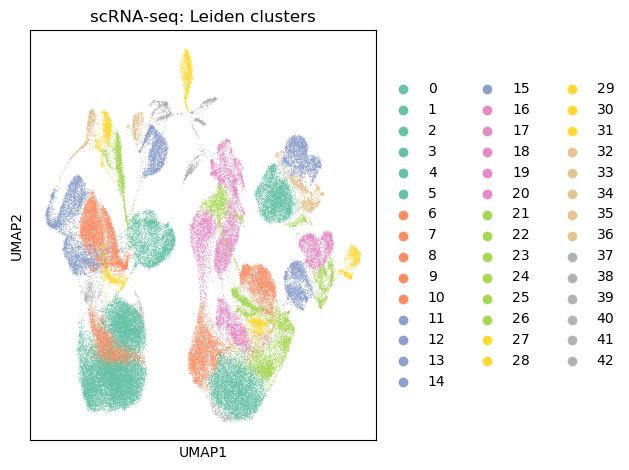

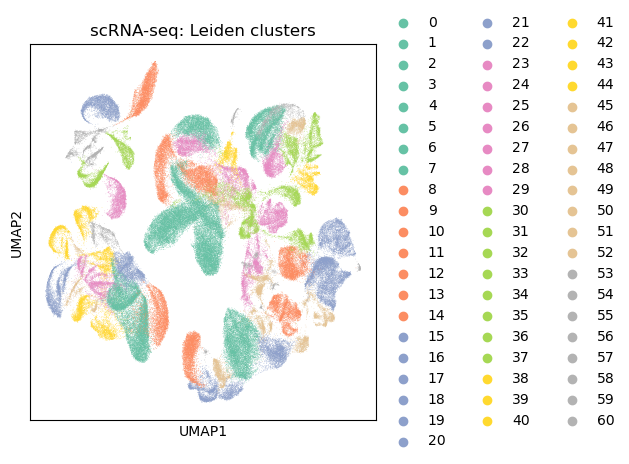

donor_id,10_fetus,10_mother,11_fetus,11_mother,12_fetus,12_mother,6_fetus,6_mother,7_fetus,7_mother,...,Hrv99_fetus,Hrv99_mother,P13_fetus,P13_mother,P14_fetus,P14_mother,P34_fetus,P34_mother,R0_mother,R1_mother
cell_type,,,,,,,,,,,,,,,,,,,,,
epithelial cell,0,72,2,0,1,362,0,80,3,36,...,0,0,1,1927,0,1098,2,3958,5,4
T cell,1,94,2,0,0,302,9,2175,8,253,...,3,29,5,39,0,45,0,192,95,424
granulocyte,0,0,0,0,0,2,0,25,0,0,...,5,4,2,9,0,11,0,6,5,16
macrophage,37,901,19,170,104,1186,14,902,9,151,...,251,238,514,2941,1,1901,158,1963,523,713
B cell,0,1,0,0,0,8,4,8,0,0,...,2,26,7,10,0,17,1,10,16,30
dendritic cell,4,16,0,1,0,34,0,114,1,27,...,0,1,1,40,0,118,0,99,10,10
stromal cell,2,2241,6,0,11,3012,12,441,37,6708,...,38,7,148,1998,1,9766,24,825,44,49
syncytiotrophoblast cell,95,0,279,0,379,2,4,0,5,4,...,67,1,21172,18,173,7,5,1,0,0
natural killer cell,1,37,0,0,0,164,2,1423,7,159,...,1,4,1,27,0,31,2,86,36,170


In [ ]:
import scanpy as sc
import pandas as pd

adata_sc = adata[adata.obs["assay_group"] == "scRNAseq"].copy()
adata_fetus = adata_sc[adata_sc.obs["donor_group"] == "fetus"].copy()
adata_mother = adata_sc[adata_sc.obs["donor_group"] == "mother"].copy()

sc.tl.pca(adata_fetus)
sc.pp.neighbors(adata_fetus, n_neighbors=15, n_pcs=30)
sc.tl.leiden(adata_fetus, resolution=1.5, key_added="leiden")
sc.tl.umap(adata_fetus, random_state=0)
fig, ax = plt.subplots(figsize=(6, 6))
ax = sc.pl.umap(
    adata_fetus,
    color="leiden",
    palette="Set2",
    legend_loc="right margin",
    title="scRNA-seq: Leiden clusters",
    show=False
)

import matplotlib.pyplot as plt
# Rasterize only the point cloud(s)
for coll in ax.collections:
    coll.set_rasterized(True)

plt.tight_layout()
ax.set_aspect("equal")
plt.savefig("umap_fetus_scRNAseq_leiden.svg", bbox_inches="tight")
plt.show()

sc.tl.pca(adata_mother)
sc.pp.neighbors(adata_mother, n_neighbors=15, n_pcs=30)
sc.tl.leiden(adata_mother, resolution=1.5, key_added="leiden")
sc.tl.umap(adata_mother, random_state=0)
fig, ax = plt.subplots(figsize=(6, 6))
ax = sc.pl.umap(
    adata_mother,
    color="leiden",
    palette="Set2",
    legend_loc="right margin",
    title="scRNA-seq: Leiden clusters",
    show=False
)

import matplotlib.pyplot as plt
# Rasterize only the point cloud(s)
for coll in ax.collections:
    coll.set_rasterized(True)

plt.tight_layout()
ax.set_aspect("equal")
plt.savefig("umap_mother_scRNAseq_leiden.svg", bbox_inches="tight")
plt.show()

ct = pd.crosstab(
    adata_sc.obs["cell_type"],
    adata_sc.obs["donor_id"]
)

ct

In [ ]:
#crosstabulation for fetus and mother separately

import pandas as pd
adata_fetus = adata_sc[adata_sc.obs["donor_group"] == "fetus"].copy()
ct = pd.crosstab(
    adata_fetus.obs["leiden"],
    adata_fetus.obs["donor_id"]
)

ct

ctab_binary_fetus = (ct > 0).astype(int)


adata_mother = adata_sc[adata_sc.obs["donor_group"] == "mother"].copy()
ct = pd.crosstab(
    adata_mother.obs["leiden"],
    adata_mother.obs["donor_id"]
)

ct

ctab_binary_mother = (ct > 0).astype(int)

In [9]:
import numpy as np
def chao2(ctab_binary, axis=1):
    # incidence per species
    incidence = np.sum(ctab_binary, axis=axis)

    S_obs = np.sum(incidence > 0)
    Q1 = np.sum(incidence == 1)
    Q2 = np.sum(incidence == 2)

    S_Chao2 = S_obs + (Q1**2) / (2 * Q2) if Q2 > 0 else S_obs

    return S_obs, Q1, Q2, S_Chao2

In [10]:
chao2(ctab_binary_fetus)
chao2(ctab_binary_mother)

(np.int64(68), np.int64(10), np.int64(15), np.float64(71.33333333333333))

In [11]:
incidence = np.sum(ctab_binary_fetus, axis=axis)
S_obs = np.sum(incidence > 0)
Q1 = np.sum(incidence == 1)
Q2 = np.sum(incidence == 2)

S_Chao2 = S_obs + (Q1**2) / (2 * Q2) if Q2 > 0 else S_obs

NameError: name 'axis' is not defined

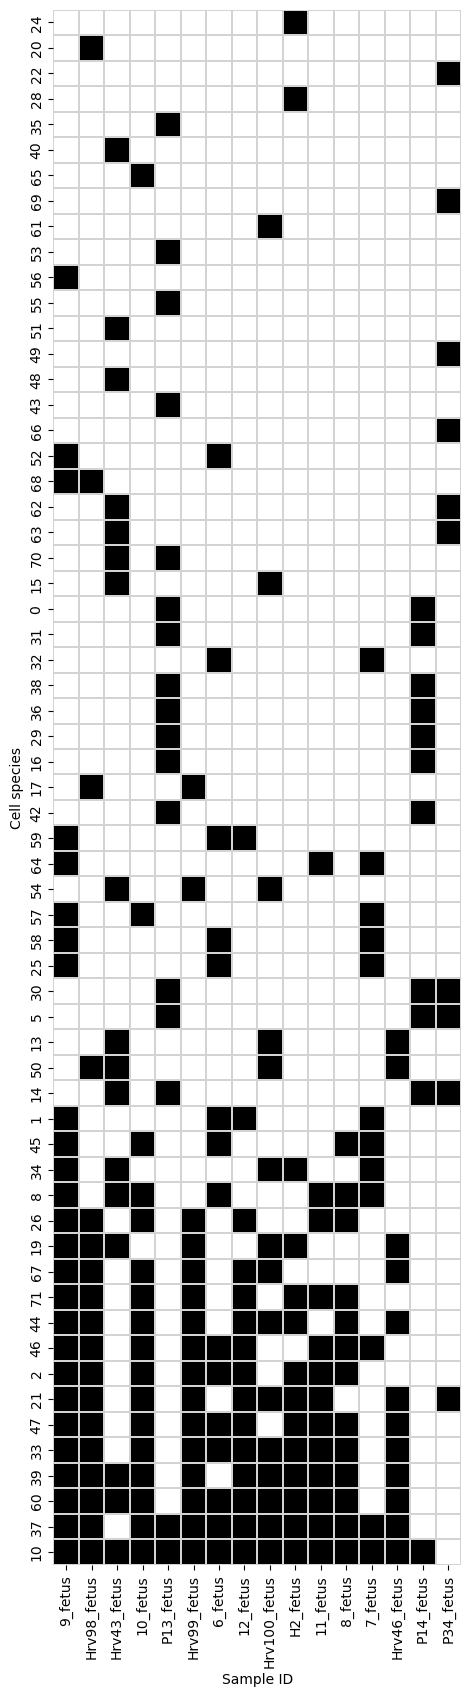

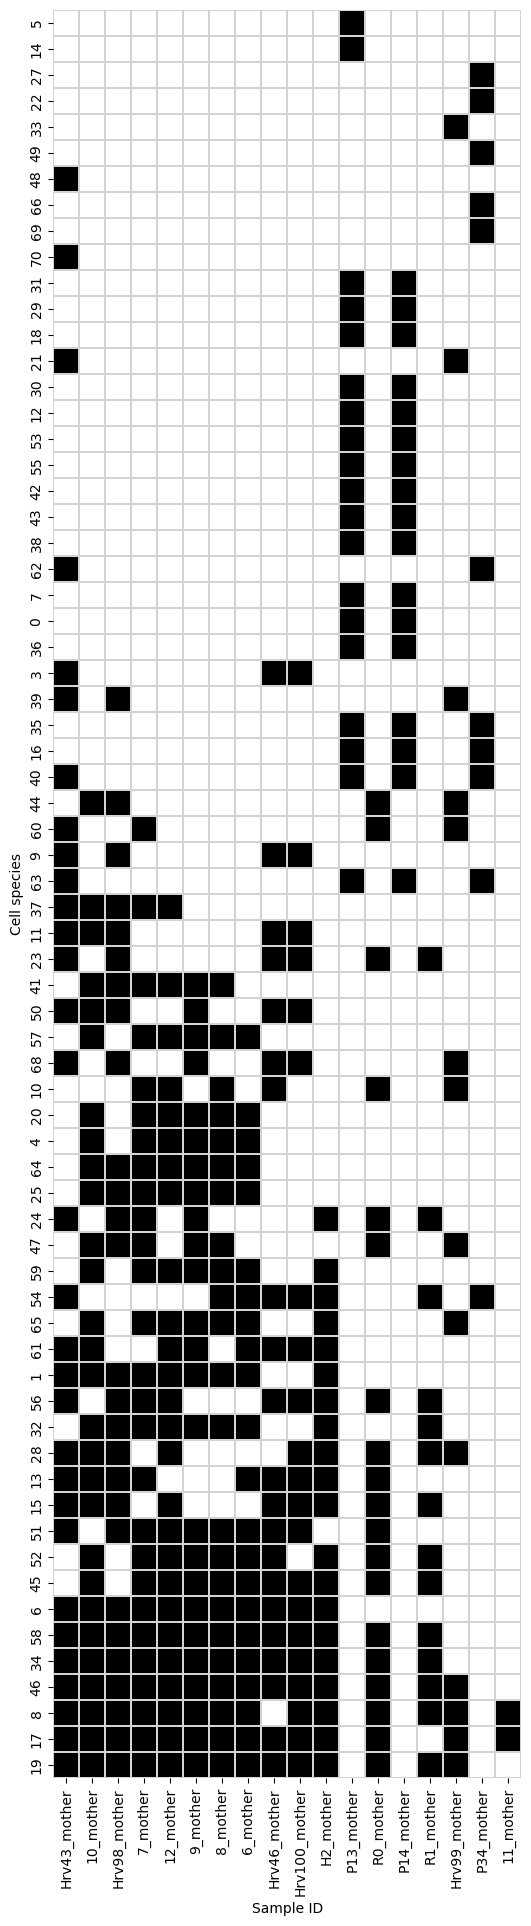

In [ ]:
#Plot based on clusters
# order donors by total cells
ctab_binary_fetus = ctab_binary_fetus.loc[
    ctab_binary_fetus.sum(axis=1).sort_values(ascending=True).index,
    ctab_binary_fetus.sum(axis=0).sort_values(ascending=False).index
]

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

n_rows, n_cols = ctab_binary_fetus.shape

# Scale figure size to data shape
figsize = (n_cols * 0.3, n_rows * 0.3)

plt.figure(figsize=figsize)

ax = sns.heatmap(
    ctab_binary_fetus,
    cmap=["white", "black"],
    cbar=False,
    square=True,
    linewidths=0.3,
    linecolor="lightgrey"
)

ax.set_aspect("equal")

plt.xlabel("Sample ID")
plt.ylabel("Cell species")
plt.tight_layout()
plt.savefig("cluster_vs_sample_fetus.svg", format="svg", bbox_inches="tight")
plt.show()

#Plot
# order donors by total cells
ctab_binary_mother = ctab_binary_mother.loc[
    ctab_binary_mother.sum(axis=1).sort_values(ascending=True).index,
    ctab_binary_mother.sum(axis=0).sort_values(ascending=False).index
]

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

n_rows, n_cols = ctab_binary_mother.shape

# Scale figure size to data shape
figsize = (n_cols * 0.3, n_rows * 0.3)

plt.figure(figsize=figsize)

ax = sns.heatmap(
    ctab_binary_mother,
    cmap=["white", "black"],
    cbar=False,
    square=True,
    linewidths=0.3,
    linecolor="lightgrey"
)

ax.set_aspect("equal")

plt.xlabel("Sample ID")
plt.ylabel("Cell species")
plt.tight_layout()
plt.savefig("cluster_vs_sample_mother.svg", format="svg", bbox_inches="tight")
plt.show()

In [6]:
#crosstabulation (cell_type) for fetus and mother separately

import pandas as pd
adata_fetus = adata_sc[adata_sc.obs["donor_group"] == "fetus"].copy()
ct = pd.crosstab(
    adata_fetus.obs["cell_type"],
    adata_fetus.obs["donor_id"]
)

ct

ctab_binary_fetus = (ct > 0).astype(int)


adata_mother = adata_sc[adata_sc.obs["donor_group"] == "mother"].copy()
ct = pd.crosstab(
    adata_mother.obs["cell_type"],
    adata_mother.obs["donor_id"]
)

ct

ctab_binary_mother = (ct > 0).astype(int)

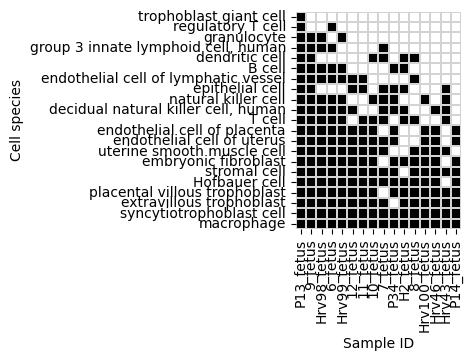

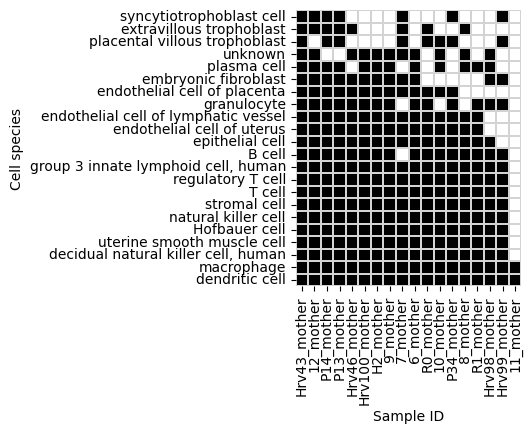

In [8]:
#Plot based on clusters
# order donors by total cells
ctab_binary_fetus = ctab_binary_fetus.loc[
    ctab_binary_fetus.sum(axis=1).sort_values(ascending=True).index,
    ctab_binary_fetus.sum(axis=0).sort_values(ascending=False).index
]

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

n_rows, n_cols = ctab_binary_fetus.shape

# Scale figure size to data shape
figsize = (n_cols * 0.3, n_rows * 0.3)

plt.figure(figsize=figsize)

ax = sns.heatmap(
    ctab_binary_fetus,
    cmap=["white", "black"],
    cbar=False,
    square=True,
    linewidths=0.3,
    linecolor="lightgrey"
)

ax.set_aspect("equal")

plt.xlabel("Sample ID")
plt.ylabel("Cell species")
plt.tight_layout()
plt.savefig("celltype_vs_sample_fetus.svg", format="svg", bbox_inches="tight")
plt.show()

#Plot
# order donors by total cells
ctab_binary_mother = ctab_binary_mother.loc[
    ctab_binary_mother.sum(axis=1).sort_values(ascending=True).index,
    ctab_binary_mother.sum(axis=0).sort_values(ascending=False).index
]

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

n_rows, n_cols = ctab_binary_mother.shape

# Scale figure size to data shape
figsize = (n_cols * 0.3, n_rows * 0.3)

plt.figure(figsize=figsize)

ax = sns.heatmap(
    ctab_binary_mother,
    cmap=["white", "black"],
    cbar=False,
    square=True,
    linewidths=0.3,
    linecolor="lightgrey"
)

ax.set_aspect("equal")

plt.xlabel("Sample ID")
plt.ylabel("Cell species")
plt.tight_layout()
plt.savefig("celltype_vs_sample_mother.svg", format="svg", bbox_inches="tight")
plt.show()



In [ ]:
#Save
adata_sc.write_h5ad("Zuck.h5ad")

# Path to the file in Downloads
file_path = "/home/mmiihkin/Python/Zuck.h5ad"

# Load the AnnData object
adata = sc.read_h5ad(file_path)

# Plot UMAP
sc.pl.umap(adata, show=True)

/home/mmiihkin/miniconda3/envs/scanpy311/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_85852/404086539.py:61: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(ad, resolution=1.0)


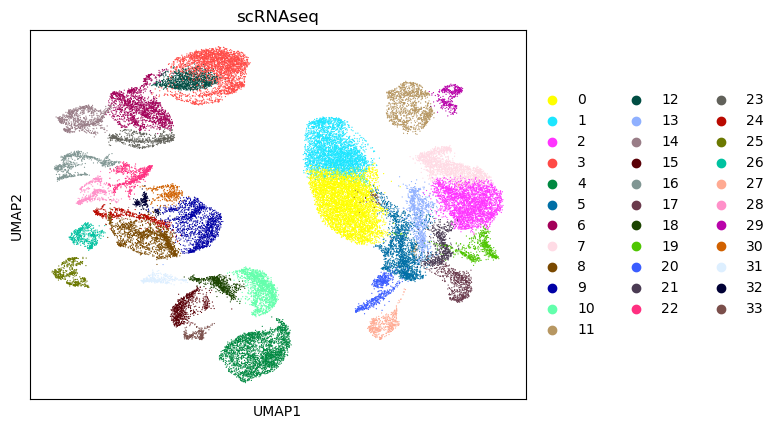

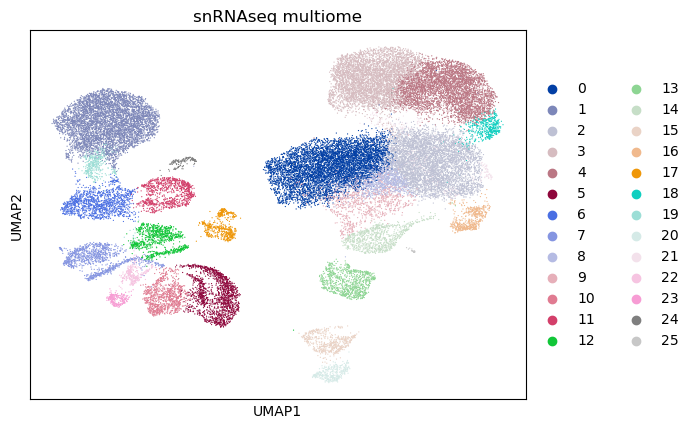

In [10]:
#comparison
import pandas as pd

import pandas as pd

ct = pd.crosstab(adata.obs["donor_id"], adata.obs["assay_group"])

donors_both = ct[
    (ct["scRNAseq"] > 0) &
    (ct["snRNAseq_multiome"] > 0)
].index.tolist()

donors_both
adata_sub = adata[adata.obs["donor_id"].isin(donors_both)].copy()
pd.crosstab(adata_sub.obs["donor_id"], adata_sub.obs["assay_group"])


import numpy as np
np.random.seed(0)

keep_idx = []

for donor in donors_both:
    idx_sn = adata_sub.obs.query(
        "donor_id == @donor and assay_group == 'snRNAseq_multiome'"
    ).index

    idx_sc = adata_sub.obs.query(
        "donor_id == @donor and assay_group == 'scRNAseq'"
    ).index

    n_sn = len(idx_sn)
    n_sc = len(idx_sc)

    # keep all snRNAseq
    keep_idx.extend(idx_sn)

    # downsample scRNAseq only if needed
    if n_sc > n_sn:
        keep_idx.extend(
            np.random.choice(idx_sc, size=n_sn, replace=False)
        )
    else:
        keep_idx.extend(idx_sc)

adata_balanced = adata_sub[keep_idx].copy()

pd.crosstab(
    adata_balanced.obs["donor_id"],
    adata_balanced.obs["assay_group"]
)

import scanpy as sc

adata_sc = adata_balanced[adata_balanced.obs["assay_group"] == "scRNAseq"].copy()
adata_sn = adata_balanced[adata_balanced.obs["assay_group"] == "snRNAseq_multiome"].copy()

for ad in [adata_sc, adata_sn]:
    sc.tl.pca(ad)
    sc.pp.neighbors(ad, n_neighbors=15, n_pcs=30)
    sc.tl.leiden(ad, resolution=1.0)
    sc.tl.umap(ad, random_state=0)

sc.pl.umap(adata_sc, color="leiden", legend_loc="right margin", title="scRNAseq")
sc.pl.umap(adata_sn, color="leiden", legend_loc="right margin", title="snRNAseq multiome")




In [16]:
import numpy as np

def chao2_bc(S_obs, Q1, Q2, T):
    # bias-corrected Chao2 (common in practice)
    if Q2 > 0:
        return S_obs + ((T - 1) / T) * (Q1 * Q1) / (2 * Q2)
    else:
        return S_obs + ((T - 1) / T) * (Q1 * (Q1 - 1)) / 2

def ichao2(ctab_binary):
    # ctab_binary: DataFrame or array-like, rows=species (cell_type), cols=samples (donors)
    X = ctab_binary.values if hasattr(ctab_binary, "values") else np.asarray(ctab_binary)
    T = X.shape[1]

    incid = X.sum(axis=1)           # in how many donors each cell type appears
    S_obs = np.sum(incid > 0)

    # Qk counts: how many cell types occur in exactly k donors
    Q1 = np.sum(incid == 1)
    Q2 = np.sum(incid == 2)
    Q3 = np.sum(incid == 3)
    Q4 = np.sum(incid == 4)

    S_chao2 = chao2_bc(S_obs, Q1, Q2, T)

    # iChao2 extra term; avoid division by zero by using Q4+1 if Q4==0 (recommended)
    denom = Q4 if Q4 > 0 else (Q4 + 1)

    extra = ((T - 3) / (4 * T)) * (Q3 / denom) * max(
        Q1 - ((T - 3) / (2 * (T - 1))) * (Q2 * Q3 / denom),
        0
    )

    return {
        "S_obs": int(S_obs),
        "Q1": int(Q1), "Q2": int(Q2), "Q3": int(Q3), "Q4": int(Q4),
        "S_Chao2_bc": float(S_chao2),
        "S_iChao2": float(S_chao2 + extra),
        "T": int(T)
    }


In [12]:
#Use Chao2 estimator on the presence/absence data (not sure if this works, I did these in R)
# Compute Chao2 estimator
S_obs = ctab_binary.sum(axis=1).sum()  # Total observed species (sum across samples)
Q1 = (ctab_binary.sum(axis=0) == 1).sum()  # Number of species appearing in exactly 1 sample
Q2 = (ctab_binary.sum(axis=0) == 2).sum()  # Number of species appearing in exactly 2 samples

# Avoid division by zero in case Q2 is 0
if Q2 > 0:
    S_Chao2 = S_obs + (Q1**2) / (2 * Q2)
else:
    S_Chao2 = S_obs  # If Q2=0, Chao2 falls back to observed richness

In [16]:
incidence = ctab_binary_fetus.sum(axis=1)   # for each cell_type: in how many donors it's present
S_obs = (incidence > 0).sum()
Q1 = (incidence == 1).sum()
Q2 = (incidence == 2).sum()
S_Chao2 = S_obs + (Q1**2)/(2*Q2) if Q2 > 0 else S_obs
S_obs

print(S_Chao2)
print(S_obs)

70.63333333333333
61


In [19]:
Q1 = (ctab_binary.sum(axis=0) == 1).sum()
Q1

np.int64(0)

In [40]:
S_obs + Q1 * (n - 1) / n

np.float64(23.970588235294116)

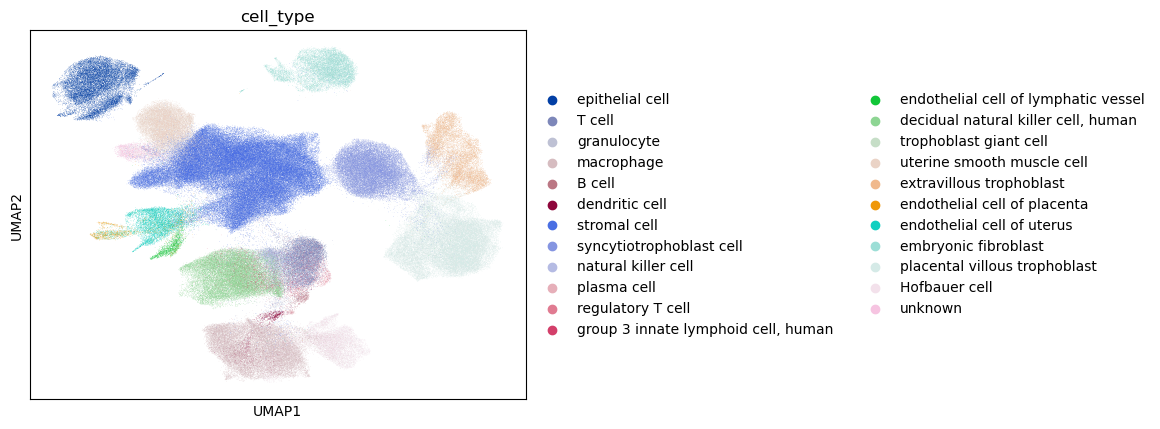

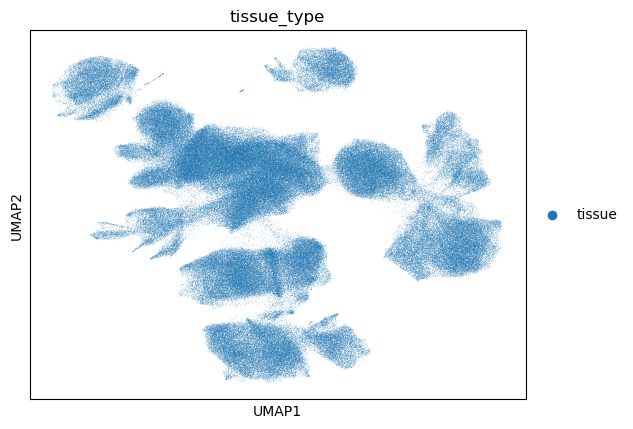

In [10]:


sc.pl.umap(adata, color="cell_type", legend_loc="right margin")
sc.pl.umap(adata, color="tissue_type", legend_loc="right margin")



/home/mmiihkin/miniconda3/envs/scanpy311/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


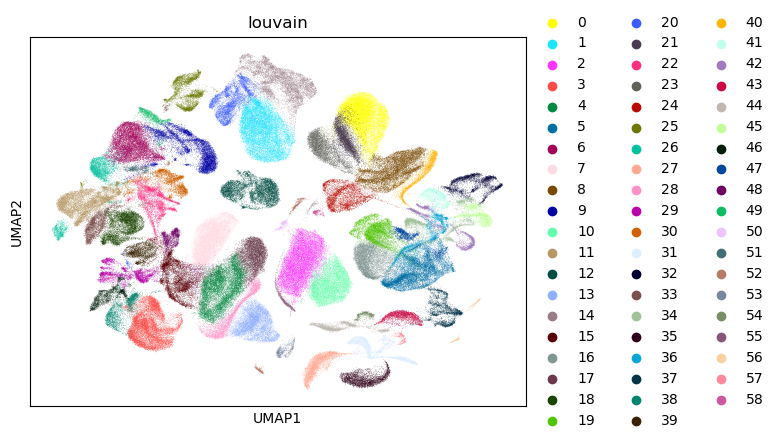

In [3]:
#Data is already logtransformed

adata_clust = adata.copy()

# If your X is already scaled, you might skip scaling.
# If you're unsure, scaling again isn't ideal; better to cluster on PCA.
sc.tl.pca(adata_clust, svd_solver="arpack")
sc.pp.neighbors(adata_clust, n_neighbors=15, n_pcs=30)

sc.tl.louvain(adata_clust, resolution=1.0, key_added="louvain")

# UMAP (only if you don't already have it for this object)
sc.tl.umap(adata_clust)

sc.pl.umap(adata_clust, color="louvain", legend_loc="right margin")